# Anomaly Detection in Python

Dataset from Kaggle : **"Pokemon with stats"** by *Alberto Barradas*  
Source: https://www.kaggle.com/abcsds/pokemon (requires login)

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [3]:
pkmndata = pd.read_csv('../data files/pokemonData.csv')
pkmndata.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Description of the dataset, as available on Kaggle, is as follows.
Learn more : https://en.wikipedia.org/wiki/List_of_Pok%C3%A9mon

> **\#** : ID for each Pokemon (runs from 1 to 721)  
> **Name** : Name of each Pokemon  
> **Type 1** : Each Pokemon has a basic Type, this determines weakness/resistance to attacks  
> **Type 2** : Some Pokemons are dual type and have a Type 2 value (set to nan otherwise)  
> **Total** : Sum of all stats of a Pokemon, a general guide to how strong a Pokemon is  
> **HP** : Hit Points, defines how much damage a Pokemon can withstand before fainting  
> **Attack** : The base modifier for normal attacks by the Pokemon (e.g., scratch, punch etc.)  
> **Defense** : The base damage resistance of the Pokemon against normal attacks  
> **SP Atk** : Special Attack, the base modifier for special attacks (e.g. fire blast, bubble beam)  
> **SP Def** : Special Defense, the base damage resistance against special attacks  
> **Speed** : Determines which Pokemon attacks first each round  
> **Generation** : Each Pokemon belongs to a certain Generation  
> **Legendary** : Legendary Pokemons are powerful, rare, and hard to catch

---

Check the vital statistics of the dataset using the `type` and `shape` attributes.

In [4]:
print("Data type : ", type(pkmndata))
print("Data dims : ", pkmndata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (800, 13)


Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [5]:
print(pkmndata.dtypes)

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


---

## Bi-Variate Anomaly Detection

Set up a Bi-Variate Anomaly Detection problem on the Pokemon Dataset.   
Features to be used for Anomaly Detection : **Total, Speed**       

Note : There is no Predictor or Response (Unsupervised Learning).

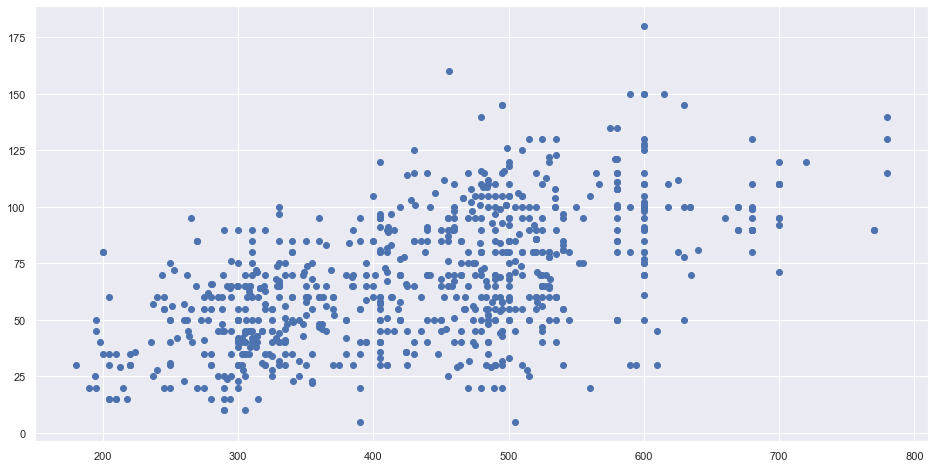

In [6]:
# Extract the Features from the Data
X = pd.DataFrame(pkmndata[["Total", "Speed"]])

# Plot the Raw Data on a 2D grid
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Total", y = "Speed", data = X)

#### Basic Anomaly Detection

Use the Nearest Neighbors (k-NN) pattern-identification method for detecting Outliers and Anomalies.    
We will use the `LocalOutlierFactor` neighborhood model from `sklearn.neighbors` module.

In [7]:
# Import LocalOutlierFactor from sklearn.neighbors
from sklearn.neighbors import LocalOutlierFactor

# Set the Parameters for Neighborhood
num_neighbors = 20      # Number of Neighbors
cont_fraction = 0.05    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(X)

LocalOutlierFactor(contamination=0.05)

#### Labeling the Anomalies in the Data

We may use the model on the data to `predict` the anomalies.

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Anomaly', ylabel='count'>

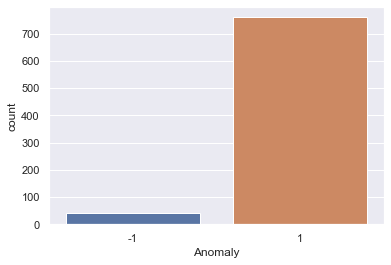

In [8]:
# Predict the Anomalies
labels = lof.fit_predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(X_labeled["Anomaly"])

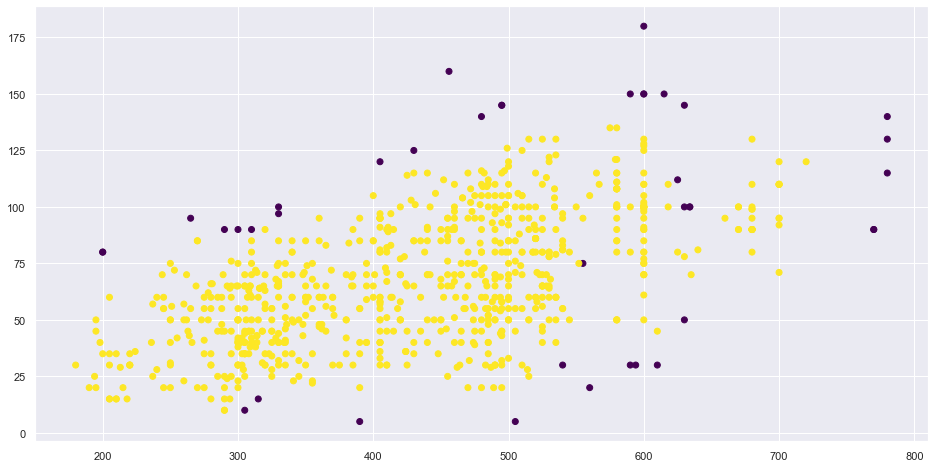

In [9]:
# Visualize the Anomalies in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Total", y = "Speed", c = "Anomaly", cmap = 'viridis', data = X_labeled)

#### Interpret the Anomalies

Try to interpret the anomalies by exploring the Features across them.

/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 30.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Speed', ylabel='Anomaly'>

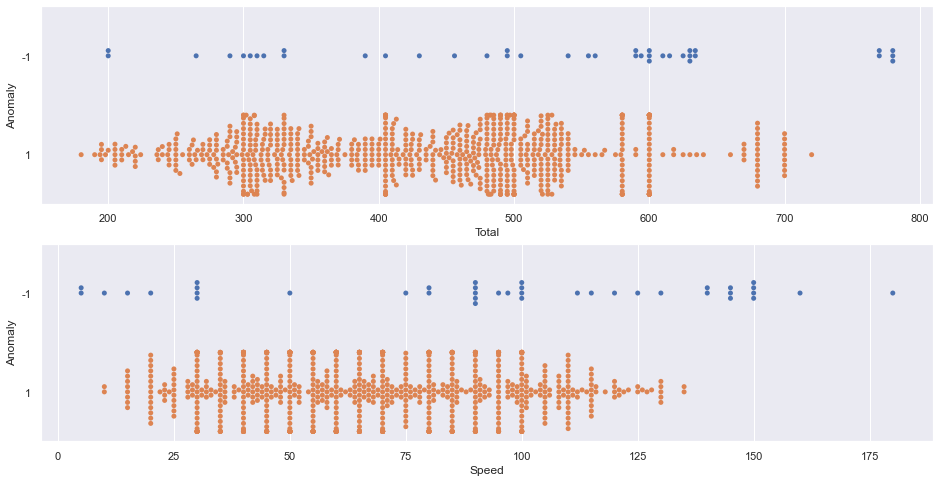

In [10]:
# Boxplots for the Features for the Anomalies
f, axes = plt.subplots(2, 1, figsize=(16,8))
sb.swarmplot(x = 'Total', y = 'Anomaly', data = X_labeled, ax = axes[0])
sb.swarmplot(x = 'Speed', y = 'Anomaly', data = X_labeled, ax = axes[1])

---

## Multi-Variate Anomaly Detection

Set up a Multi-Variate Anomaly Detection problem on the Pokemon Dataset.   
Features : **Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed**  

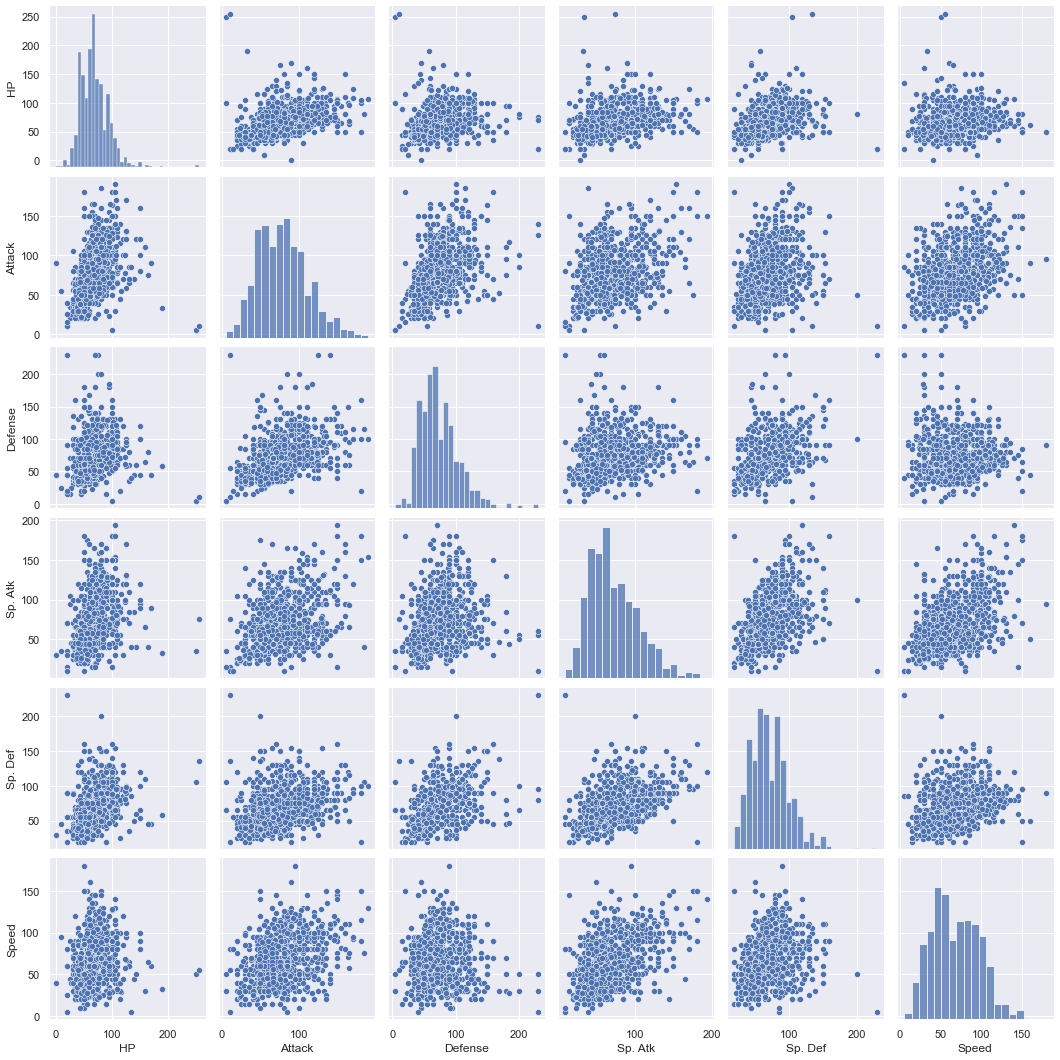

In [11]:
# Extract the Features from the Data
X = pd.DataFrame(pkmndata[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]) 

# Plot the Raw Data on 2D grids
sb.pairplot(X)

In [12]:
# Import LocalOutlierFactor from sklearn.neighbors
from sklearn.neighbors import LocalOutlierFactor

# Set the Parameters for Neighborhood
num_neighbors = 20      # Number of Neighbors
cont_fraction = 0.05    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(X)

LocalOutlierFactor(contamination=0.05)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Anomaly', ylabel='count'>

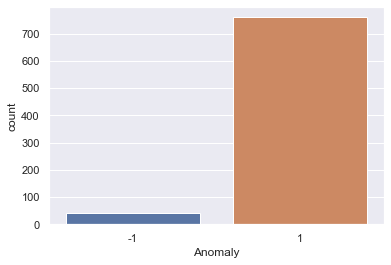

In [13]:
# Predict the Anomalies
labels = lof.fit_predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(X_labeled["Anomaly"])

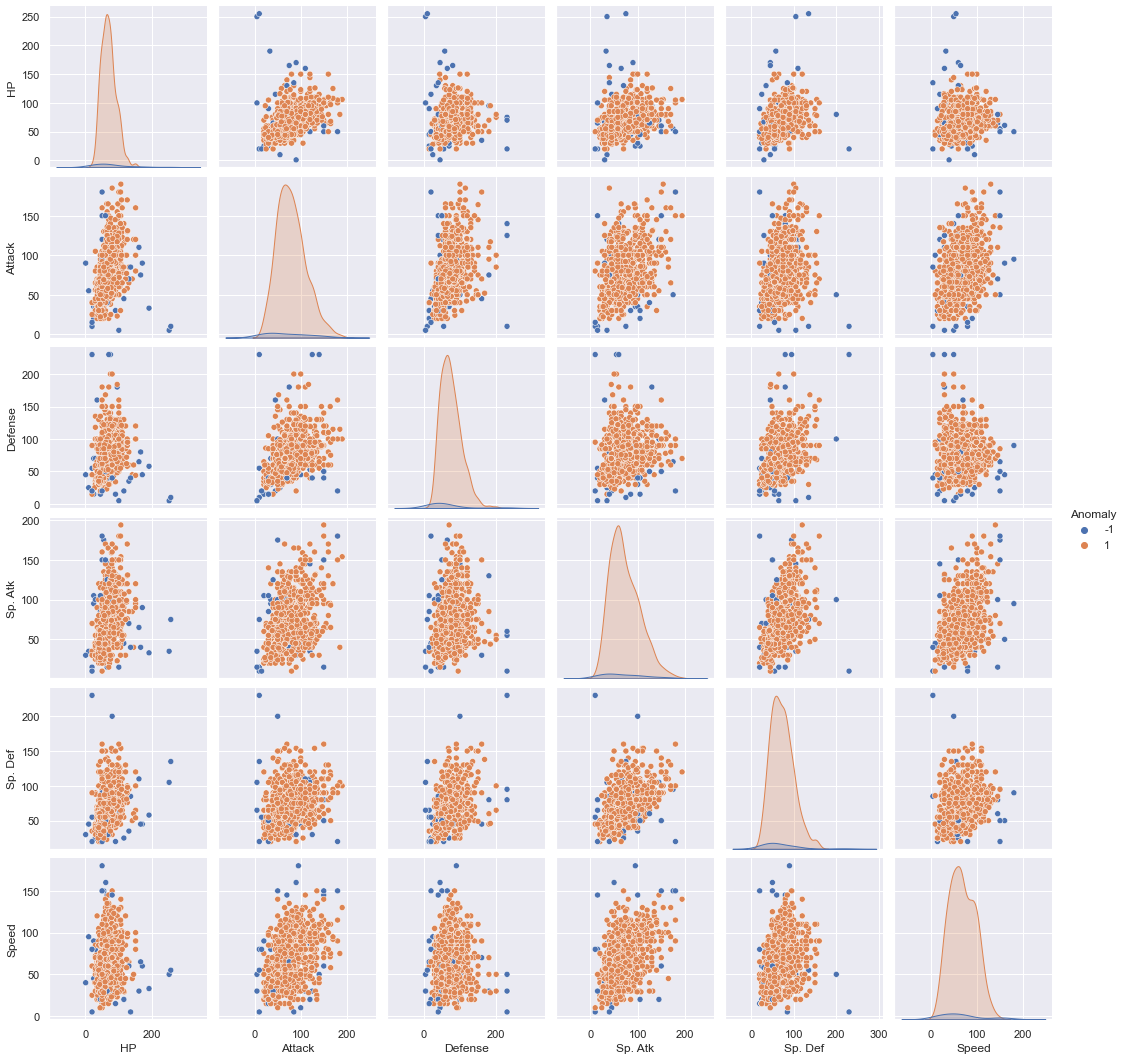

In [14]:
# Visualize the Anomalies in the Data
sb.pairplot(X_labeled, vars = X.columns.values, hue = "Anomaly")

<AxesSubplot:xlabel='Speed', ylabel='Anomaly'>

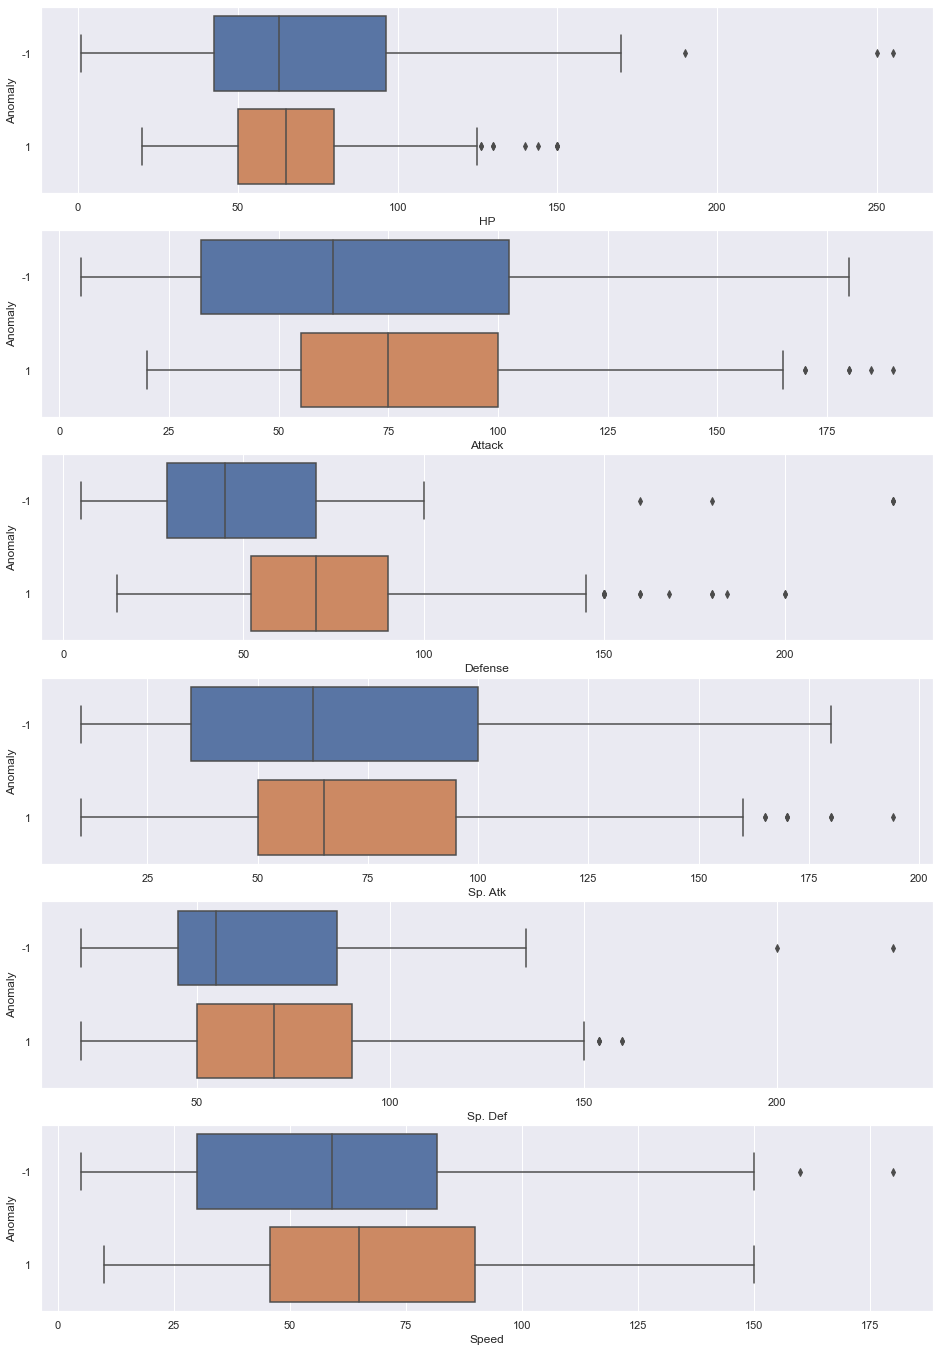

In [15]:
# Boxplots for all Features against the Anomalies
f, axes = plt.subplots(6, 1, figsize=(16,24))
sb.boxplot(x = 'HP', y = 'Anomaly', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'Attack', y = 'Anomaly', data = X_labeled, ax = axes[1])
sb.boxplot(x = 'Defense', y = 'Anomaly', data = X_labeled, ax = axes[2])
sb.boxplot(x = 'Sp. Atk', y = 'Anomaly', data = X_labeled, ax = axes[3])
sb.boxplot(x = 'Sp. Def', y = 'Anomaly', data = X_labeled, ax = axes[4])
sb.boxplot(x = 'Speed', y = 'Anomaly', data = X_labeled, ax = axes[5])